# A Basic Introduction to Supervised Machine Learning

Last updated 2 June 2020 by Vanessa Meschke (vmeschke@mymail.mines.edu)

This notebook is a demo of the machine learning algorithms available through Scikit Learn.

In [53]:
# imports
!pip install joblib
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Supervised and Unsupervised Learning Methods

There are two broad classes of machine learning tasks: supervised and unsupervised learning. The easiest way to distinguish between the two is by determining if the data set is labelled or unlabelled: supervised learning requires labelled data and unsupervised learning uses unlabelled data.


### Supervised Learning
In supervised learning, some type of ground truth is known about our data set - in other words, we know the value of the variable we're trying to predict (the data set is labelled) and we're trying to accurately predict that variable for many data points. You can compare the performance of different models because you can score how well the model predicted the data. Under supervised learning, there are another two types of tasks: classification and regression.
- Classification: The values of the target variable are part of a discrete set (for example: colors of the rainbow, types of macaroni and cheese shapes, classes of rock, or roasts of coffee). Classification tasks try to predict a class label.
- Regression: The values of the target variable are continuous (for example: height of a tree, speed of a rollerblader, volume of coffee I've drank today, or amount of time the baby in your neighbor's apartment has been crying).

### Unsupervised Learning
In contrast, unsupervised learning techniques don't focus on predicting an actual value of a target variable because the actual value isn't known (the data is unlabelled). Instead, unsupervised learning is used to learn more about the inherent structure of the data set. This notebook won't address any examples of unsupervised learning.

## Classification Example

In the following code block, we'll go through an example of predicting a discrete variable using the k nearest neighbors algorithm. This algorithm works by calculating the distance between one data point and its k nearest neighbors. The label of the data point is set to be the class of the majority of the k nearest neighbors.

The data set we're using in this example is on [types of irises](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) (the flower, not the color part of your eye) from Scikit-Learn. Here, we're trying to classify what type of iris (setosa, versicolor, or virginica) based of the length and width of its sepals.

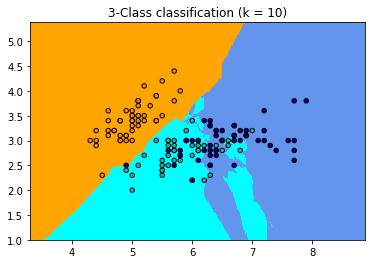

Predicted class label for left out data point: [0]
Actual class label for left out data point: 0


In [80]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# set the number of nearest neighbors 
n_neighbors = 10

# import iris data
iris = datasets.load_iris()

# Get the first two features of the data set (the length and width of the widest petals (called sepals))
X = iris.data[:, :2]
y = iris.target

# remove a sample to use for predicting later
index_to_remove = 10
test_X = X[index_to_remove, :] # Store data
test_y = y[index_to_remove]
X = np.delete(X, index_to_remove, 0) # Remove data from original data set
y = np.delete(y, index_to_remove, 0)

# Create color maps to make our plot pretty 
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
h = .02  # step size in the mesh 

# create an instance of kNN Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary, which shows what type of iris a given data point will be classified as
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))

plt.show()

# Predict class label for left out data point
prediction = clf.predict(test_X.reshape(1,-1))

print('Predicted class label for left out data point: ' + str(prediction))
print('Actual class label for left out data point: ' + str(test_y))

## Regression Example

In the following code block, we'll go through an example of predicting a continuous variable using the random forest algorithm. The data we're using is from TEDesign lab, and we'll be trying to predict the lattice thermal conductivity of the material given some material properties.

In [55]:
# Read in the data
data_path = 'tedesignlab.csv' # This is where your data is located. 
all_data = pd.read_csv(data_path) # Turn CSV into pandas DataFrame
all_data.head() # See first 5 row of data set

# Regression - predict lattice thermal conductivity using bulk modulus, average coordination number, 
# and hole/electron mobility as features
# Read in data
kappa = all_data['Lattice Thermal Conductivity (W/m K)'].values # Get thermal cond & convert to NumPy array 
bm = all_data['Bulk Modulus (GPa)'].values
bm = bm.reshape((len(bm), 1))
mu_h = all_data['Hole mobility (cm^2 / V s)'].values
mu_h = mu_h.reshape((len(mu_h), 1))
mu_e = all_data['Electron mobility (cm^2 / V s)'].values
mu_e = mu_e.reshape((len(mu_e), 1))
vol_per_atom = all_data['Volume per Atom (A^3)'].values
vol_per_atom = vol_per_atom.reshape((len(vol_per_atom), 1))
density = all_data['density (g/cm^3)'].values
density = density.reshape((len(density), 1))

X = []
for i in range(len(bm)):
    row = [bm[i], mu_e[i], mu_h[i], vol_per_atom[i], density[i]]
    X.append(row)

#from sklearn.datasets import load_diabetes
X = np.asarray(X).reshape((len(bm), 5))

# Set inputs to model - we'll use random forest here
n_estimators = 10
rf = RandomForestRegressor(n_estimators)
rf.fit(X, kappa)

# BM, mu_e, mu_h
pbte = np.asarray([38.51, 184.53, 267.5, 35.23, 7.89]).reshape(1, -1)

pbte_predicted = rf.predict(pbte)
print('Predicted kappa for PbTe: ' + str(pbte_predicted))

Predicted kappa for PbTe: [2.83]


## Assessing Model Accuracy

### Classification Accuracy
To calculate the accuracy of a classification model, there are several different values we can calculate. These can be summarized in a table called a confusion matrix, where the cells in the table are:
- True Positive: Actual value is true & model predicts true
- True Negative: Actual value is false & model predicts false
- False Positive: Actual value is false & model predicts true
- False Negative: Actual value is true & model predicts false

By using a confusion matrix, we can quickly assess how and where our model is failing (for example, we may see a model that gives no false negatives, but may give false positives). Model success & failures can be tuned for specific applications (e.g. in medical applications, it's very important to not give false negatives when classifying).

Another way to assess model classification accuracy is by computing the F1 score, which is calculated as:
$F1 = 2\frac{\textrm{precision} \cdot \textrm{recall}}{\textrm{precision} + \textrm{recall}}$ <br>

where precision is $\frac{\textrm{number of correct positive results}}{\textrm{number of all positive results returned by the classifier}}$ <br>

and recall is $\frac{\textrm{number of true positives}}{\textrm{number of positive samples}}$. 

A perfect F1 score is 1.

Let's calculate the F1 score for a set of test data on the iris data set.

In [91]:
from sklearn.metrics import f1_score, confusion_matrix

# import iris data
iris = datasets.load_iris()

# Get the first two features of the data set (the length and width of the widest petals (called sepals))
X = iris.data[:, :2]
y = iris.target

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# create an instance of kNN Classifier and fit the data.
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X_train, y_train)

# Predict the test data and print out confusion matrix, F1 score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print("F1 Score")
print(f1_score(y_test, y_pred, labels=[0, 1, 2], average='micro'))

Confusion Matrix
[[13  0  0]
 [ 0 13  0]
 [ 0  5  7]]
F1 Score
0.868421052631579


### Regression Accuracy
There are several metrics that can gauge the performance of a regression model. The ones we'll cover from Scikit-Learn are the:
- Mean Absolute Error: $\frac{1}{n}\sum_{i = 1}^{n}(predicted_{i} - actual_{i})$ (No Error has MAE = 0)
- Mean Squared Error: $\frac{1}{n}\sum_{i = 1}^{n}(predicted_{i} - actual_{i})^{2}$ (No Error has MSE = 0)
- R$^{2}$ Score = $1 - \frac{\sum_{i = 1}^{n}(actual_{i} - predicted_{i})^{2}}{\sum_{i = 1}^{n}(actual_{i} - avg. actual)^{2}}$ (No Error has R$^{2}$ = 1)

However, I find it useful to also use the root mean squared error normalized by the standard deviation to also be useful in assessing model accuracy.
- Normalized Root Mean Squared Error: $\frac{\sqrt{\frac{1}{n}\sum_{i = 1}^{n}(predicted_{i} - actual_{i})^{2}}}{StDev(actual)}$ (No Error has Normalized RMSE = 0)

In [56]:
# Actual value of kappa for PbTe
pbte_actual = 6.09

# MAE
pbte_mae = mean_absolute_error([pbte_actual], [pbte_predicted])

# MSE
pbte_mse = mean_squared_error([pbte_actual], [pbte_predicted])

# R^2 (Note: Need at least two samples for R^2 in Scikit-Learn)
pbte_r2 = r2_score([pbte_actual], [pbte_predicted])

# Normalized RMSE
pbte_nrmse = math.sqrt(pbte_mse)/np.std(kappa)

# Print
print("Mean Absolute Error: " + str(pbte_mae))
print("Mean Squared Error: " + str(pbte_mse))
print("R^2 Score: " + str(pbte_r2))
print("Normalized Root Mean Squared Error: " + str(pbte_nrmse))

Mean Absolute Error: 3.26
Mean Squared Error: 10.6276
R^2 Score: nan
Normalized Root Mean Squared Error: 0.11385347146755789


c:\users\vanessa\appdata\local\programs\python\python37-32\lib\site-packages\scikit_learn-0.21.2-py3.7-win32.egg\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## More Realistic Representations of Model Generality Using Cross Validation
What's the goal of machine learning? Hopefully, it would be for the models we train to be able to predict something useful. I personally don't find it very useful to predict values we already know and would much rather train a machine learning model to be good at predicting something I don't know. How do we tell when a model has actually learned something, though? One way to gauge if a model has learned any trends is by predicting some data that wasn't used for training. using a strategy called cross validation. However, data scientists don't often have the luxury of having a ton of data lying around that they can just leave some of it out for gauging model accuracy. Cross validation helps us test how well a model can generalize what it's learned from the training data set we gave it without needing to reserve a portion of our data set until the very end of model training. 

When using cross validation, there are two different types of data we talk about: training data and testing data. Training data is the data the model sees during the process of updating its weights. After the model is done training, it predicts the values of the test data, which it hasn't seen before. Two of the more commons methods of cross validation are leave one out (LOOCV) and k-fold.

### Leave One Out CV
In leave one out cross validation, one data point is removed from the training data set and reserved for testing. The process of removing one data point for testing and training with the remainder of the data set is repeated until every point in the data set has been used for testing.

Pros:
- You learn from most of your training data since only 1 data point is removed from training each round.

Cons:
- Computationally expensive. You fit your model as many times as there are data points in the data set.
- If your data set consists of many similar data points, you may not get an accurate representation of how well your model can predict new data.

In [57]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut() # Make Leave One Out object
rf = RandomForestRegressor() # Set up new random forest

mse = []
count = 1
for train, test in loo.split(X):
    rf.fit(X[train], kappa[train])
    predictions = rf.predict(X[test])
    mse.append(mean_squared_error(kappa[test],predictions)) #true, predict

print("Cross-Validated Mean Squared Error: " + str((np.average(np.asarray(mse)))))
print('Predicted kappa for PbTe: ' + str(rf.predict(pbte)))

c:\users\vanessa\appdata\local\programs\python\python37-32\lib\site-packages\scikit_learn-0.21.2-py3.7-win32.egg\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross-Validated Mean Squared Error: 404.60973502304955
Predicted kappa for PbTe: [2.793]


### k-Fold Cross Validation
In k-fold cross validation, we break the data into similarly-sized subsets to use for training & testing. During this process, one subset (called a fold) is reserved for testing the model, while the remaining folds are used to train the model. This process helps us to avoid a phenomenon called overfitting, where the model hasn't learned anything except the exact data in the data set!

Pros: 
- Requires less computation time than Leave One Out CV for k << number of samples in data set

Cons:
- Time to train the model increases with the number of folds 
- Model doesn't get to learn from most of the data in your data set. Fewer data points are used for training as k decreases.

c:\users\vanessa\appdata\local\programs\python\python37-32\lib\site-packages\scikit_learn-0.21.2-py3.7-win32.egg\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
c:\users\vanessa\appdata\local\programs\python\python37-32\lib\site-packages\scikit_learn-0.21.2-py3.7-win32.egg\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


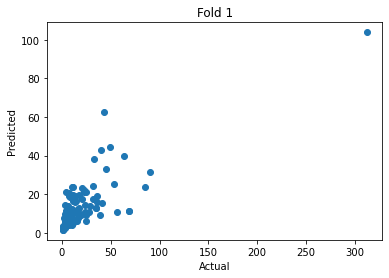

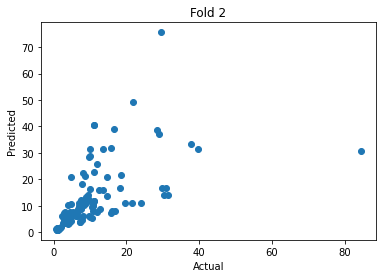

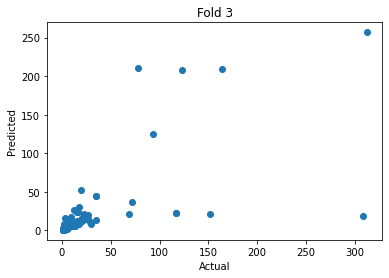

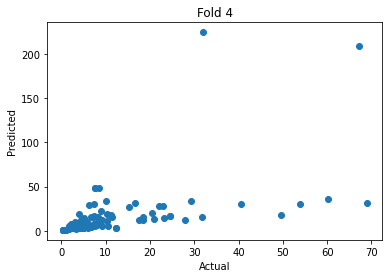

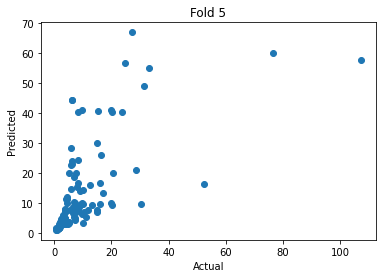

5
Cross-Validated Mean Squared Error: 580.807632874115
Predicted kappa for PbTe: [2.836]


<Figure size 432x288 with 0 Axes>

In [49]:
from sklearn.model_selection import KFold

num_folds = 5 # Set number of divisions in dataset
kf = KFold() # Create K Fold object
rf = RandomForestRegressor() # Set up new random forest

# Loop over folds. Train with N-1, test with 1, until every fold has been used for testing.
num_folds = 5
kfold = KFold(num_folds)

mse = []
count = 1
for train, test in kfold.split(X):
    rf.fit(X[train], kappa[train])
    predictions = rf.predict(X[test])
    mse.append(mean_squared_error(kappa[test],predictions)) #true, predict
    plt.scatter(kappa[test], predictions)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Fold ' + str(count))
    plt.show()
    plt.clf()
    count = count + 1
    
print(len(mse)) # Check how many times the model was trained
print("Cross-Validated Mean Squared Error: " + str((np.average(np.asarray(mse)))))
print('Predicted kappa for PbTe: ' + str(rf.predict(pbte)))